In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from itertools import zip_longest

In [7]:
goal = 850000
car_payment = 50000
subscriptons = 900

years = {0: [],
         1: [],
         2: [],
         3: []}

saving_trajs = {0: [],
                1: [],
                2: [],
                3: []}

vacations = {0: [],
             1: [],
             2: [],
             3: []}


for lifestyles in range(4):
    for iter in range(1000):

        retirement_funds = 20000
        traj = []
        traj.append(retirement_funds)
        vacations[lifestyles].append(0)
        for yr in range(149):

            market_return = np.random.normal(0.06, 0.12)

            retirement_funds *= (1 + market_return)
            retirement_funds += (3000 * (1 + .02) ** yr)

            if lifestyles in [1,3]: retirement_funds = retirement_funds - subscriptons
            if (lifestyles in [2,3]) and (yr == 3):
                retirement_funds = retirement_funds - car_payment
            elif (lifestyles in [0,1]) and (yr == 8):
                retirement_funds = retirement_funds - car_payment

            traj.append(retirement_funds)
            if ((traj[-1] - traj[-2]) > 11000) and retirement_funds<goal:
                vacations[lifestyles][-1] += 1

        
        goal_achieved = np.nonzero(np.array(traj) > goal)[0][0] 
        saving_trajs[lifestyles].append(traj)
        years[lifestyles].append(goal_achieved)

print('Number of years to retire:\nNo Subs, Delayed Car: {}\nSubs, Delayed Car: {}\nNo Subs, Early Car: {}\nSubs, Early Car: {}'.format(np.mean(years[0]),np.mean(years[1]),np.mean(years[2]),np.mean(years[3])))
print('Number of PTO years:\nNo Subs, Delayed Car: {}\nSubs, Delayed Car: {}\nNo Subs, Early Car: {}\nSubs, Early Car: {}'.format(np.mean(vacations[0]),np.mean(vacations[1]),np.mean(vacations[2]),np.mean(vacations[3])))

Number of years to retire:
No Subs, Delayed Car: 48.639
Subs, Delayed Car: 51.511
No Subs, Early Car: 51.46
Subs, Early Car: 54.937
Number of PTO years:
No Subs, Delayed Car: 19.746
Subs, Delayed Car: 19.708
No Subs, Early Car: 19.134
Subs, Early Car: 18.882


In [22]:
traj_arrays = {}

traj_arrays['{:.1f} yrs: No Subscriptions, Delayed Car'.format(np.mean(years[0]))] = np.array(saving_trajs[0])[:,0:int(np.mean(years[0]))]
traj_arrays['{:.1f} yrs: Subscriptions, Delayed Car'.format(np.mean(years[1]))] = np.array(saving_trajs[1])[:,0:int(np.mean(years[1]))]
traj_arrays['{:.1f} yrs: No Subscriptions, Early Car'.format(np.mean(years[2]))] = np.array(saving_trajs[2])[:,0:int(np.mean(years[2]))]
traj_arrays['{:.1f} yrs: Subscriptions, Early Car'.format(np.mean(years[3]))] =  np.array(saving_trajs[3])[:,0:int(np.mean(years[3]))]

In [24]:
def plot_w_err(data,title,xlabel,ylabel,var=False,sample=True,alpha=0.1,hline=False,hline_label = 'Target'):
    '''
    Plots a line with error bars.
    '''

    if sample: ddof = 1
    else: ddof = 0

    for key in data.keys():
        mean = np.nanmean(data[key],axis=0)
        p = plt.plot(mean, label=key)
        std = np.nanstd(data[key],axis=0,ddof=ddof)  
        plt.fill_between(range(std.shape[0]), mean + std, mean - std, color=p[0].get_color(), alpha=alpha)
    if hline != False: plt.hlines(hline, 0, mean.shape[0], color ='r',linestyles='dashed',label=hline_label)
    plt.xlabel(xlabel, fontsize=16,fontweight='bold')
    plt.ylabel(ylabel, fontsize=16,fontweight='bold')  
    plt.title(title, fontsize=20,fontweight='bold')
    plt.ticklabel_format(axis='y', style='plain')
    plt.legend(loc='upper left')
    plt.savefig('Images/{}.png'.format(title),bbox_inches='tight')

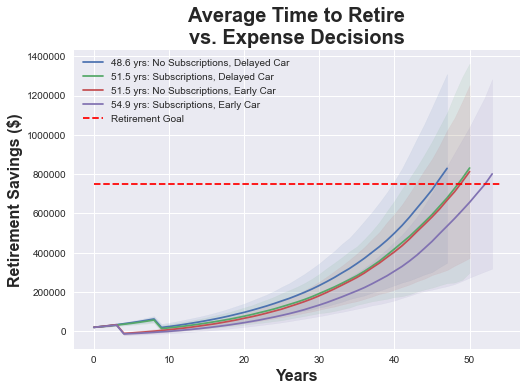

In [25]:
plot_w_err(traj_arrays,'Average Time to Retire\nvs. Expense Decisions','Years','Retirement Savings ($)',hline = goal,hline_label='Retirement Goal',sample=False)

In [28]:
(s + '_test' for s in traj_arrays.keys())

<generator object <genexpr> at 0x7febefc41eb0>